In [9]:
from graphe import Graph 
import numpy as np

# Roy-Warshall

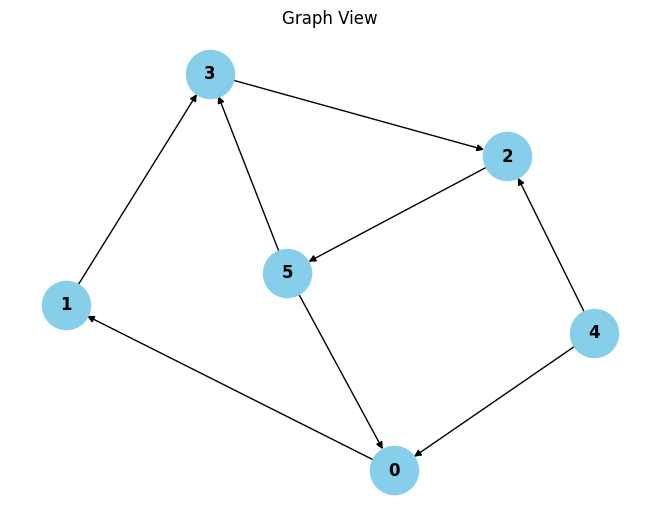

     R0                P0
[1 1 0 0 0 0]     [1 1 0 0 0 0]
[0 1 0 1 0 0]     [0 2 0 2 0 0]
[0 0 1 0 0 1]     [0 0 3 0 0 3]
[0 0 1 1 0 0]     [0 0 4 4 0 0]
[1 0 1 0 1 0]     [5 0 5 0 5 0]
[1 0 0 1 0 1]     [6 0 0 6 0 6]
_________
     R1                P1
[1 1 0 0 0 0]     [1 1 0 0 0 0]
[0 1 0 1 0 0]     [0 2 0 2 0 0]
[0 0 1 0 0 1]     [0 0 3 0 0 3]
[0 0 1 1 0 0]     [0 0 4 4 0 0]
[1 1 1 0 1 0]     [5 1 5 0 5 0]
[1 1 0 1 0 1]     [6 1 0 6 0 6]
_________
     R2                P2
[1 1 0 1 0 0]     [1 1 0 2 0 0]
[0 1 0 1 0 0]     [0 2 0 2 0 0]
[0 0 1 0 0 1]     [0 0 3 0 0 3]
[0 0 1 1 0 0]     [0 0 4 4 0 0]
[1 1 1 1 1 0]     [5 1 5 2 5 0]
[1 1 0 1 0 1]     [6 1 0 6 0 6]
_________
     R3                P3
[1 1 0 1 0 0]     [1 1 0 2 0 0]
[0 1 0 1 0 0]     [0 2 0 2 0 0]
[0 0 1 0 0 1]     [0 0 3 0 0 3]
[0 0 1 1 0 1]     [0 0 4 4 0 3]
[1 1 1 1 1 1]     [5 1 5 2 5 3]
[1 1 0 1 0 1]     [6 1 0 6 0 6]
_________
     R4                P4
[1 1 1 1 0 1]     [1 1 4 2 0 3]
[0 1 1 1 0 1]     [0 2 4 2 0 3

In [10]:
M = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0]
])

G = Graph(oriented=True)
G.load_from_matrix(M)
G.plot_graph(seed=42)

AC, pi = G.roy_warshall(verbose=True)
print("Accessibility matrix:")
print(AC.astype(int))
print("_________")
print("Predecessors matrix:")
print(pi)
print("_________")
begin, end = 1, 6
print(f"a path from {begin} to {end} is : {G.find_path(pi, begin, end)}")

# Floyd-Warshall

In [11]:
M = np.array([
    [np.inf, 4, np.inf, -3, np.inf],
    [np.inf, 2, 1, 2, np.inf],
    [np.inf, np.inf, np.inf, np.inf, 2],
    [np.inf, np.inf, -3, np.inf, 5],
    [7, np.inf, np.inf, np.inf, np.inf]
])

G = Graph(oriented=True, valued=True)
G.load_from_matrix(M)
#G.plot_graph()

D, pi = G.floyd_warshall(verbose=True)
print("The shortest distances matrix :")
print(D)
print("_________")
print("The predecessors matrix :")
print(pi)
print("_________")
begin, end = 1, 5
print(f"a path from {begin} to {end} is : {G.find_path(pi, begin, end)}")

          D0                  P0
[ 0.  4. inf -3. inf]     [1 1 0 1 0]
[inf  0.  1.  2. inf]     [0 2 2 2 0]
[inf inf  0. inf  2.]     [0 0 3 0 3]
[inf inf -3.  0.  5.]     [0 0 4 4 4]
[ 7. inf inf inf  0.]     [5 0 0 0 5]
_________
          D1                  P1
[ 0.  4. inf -3. inf]     [1 1 0 1 0]
[inf  0.  1.  2. inf]     [0 2 2 2 0]
[inf inf  0. inf  2.]     [0 0 3 0 3]
[inf inf -3.  0.  5.]     [0 0 4 4 4]
[ 7. 11. inf  4.  0.]     [5 1 0 1 5]
_________
          D2                  P2
[ 0.  4.  5. -3. inf]     [1 1 2 1 0]
[inf  0.  1.  2. inf]     [0 2 2 2 0]
[inf inf  0. inf  2.]     [0 0 3 0 3]
[inf inf -3.  0.  5.]     [0 0 4 4 4]
[ 7. 11. 12.  4.  0.]     [5 1 2 1 5]
_________
          D3                  P3
[ 0.  4.  5. -3.  7.]     [1 1 2 1 3]
[inf  0.  1.  2.  3.]     [0 2 2 2 3]
[inf inf  0. inf  2.]     [0 0 3 0 3]
[inf inf -3.  0. -1.]     [0 0 4 4 3]
[ 7. 11. 12.  4.  0.]     [5 1 2 1 5]
_________
          D4                  P4
[ 0.  4. -6. -3. -4.]     [1 1 4 1 

# Dijkstra

In [12]:
M = np.array([[np.inf, 3, 8, np.inf, 4],
              [np.inf, np.inf, np.inf, 1, 7],
              [np.inf, 4, np.inf, np.inf, np.inf],
              [2, np.inf, 5, np.inf, np.inf],
              [np.inf, np.inf, np.inf, 6, np.inf]])

G = Graph(oriented=True, valued=True)
G.load_from_matrix(M)
#G.plot_graph()

origin = 0
d, pi = G.dijkstra(origin, verbose=True)
print(f"The minimal distances from the node {origin}:")
print(d)
print("_________")
print(f"The predecessors in the shortest path from the node {origin}:")
print(pi)
print("_________")
dest = 5
#print(f"The shortest path from the node {origin} to {dest}:\
#    {G.shortest_path_from_origin(pi, dest, origin)}")

iter_0 :
distances array : [ 0. inf inf inf inf]
predecessors array : [0 0 0 0 0]
opens array : [ True False False False False]
closed array : [False False False False False]
_________
iter_0 :
vertex_1 :
distances array : 
[ 0. inf inf inf inf]
predecessors array : 
[0 0 0 0 0]
opens array : 
[ True False False False False]
closed array : 
[ True False False False False]
The minimal distances from the node 0:
[ 0. inf inf inf inf]
_________
The predecessors in the shortest path from the node 0:
[-1 -1 -1 -1 -1]
_________
